# A random walk with both nice and extreme distributions

⭐ This notebook presents all the reproducible experiments for the _A random walk with both nice and extreme distributions_ blogpost available on Medium : **https://medium.com/@jb.excoffier/a-random-walk-with-both-nice-and-extreme-distributions-842a8cc3e048**. 

# Import package
- Installed using the `requirements.txt` file.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats

import matplotlib.pyplot as plt

# 👣 Random walk function

In [2]:
def random_walk(one_dim_dist, n:int=100, dim:int=2, start=None) :
    full_walk = np.zeros((n, dim))
    
    if start :
        if start.shape[0] != dim :
            raise ValueError("Length of 'start' vector must be equal to 'dim'.")
        full_walk[0, :] = start
        
    
    for i in range(1, n) :
        step = [one_dim_dist() for j in range(dim)]
        full_walk[i, :] = full_walk[i-1, :] + step
        
    return full_walk

### _General parameters for the random walk_
- Default dimension is `dim=2`.
- Default number of steps is `n=1000`.

In [3]:
dim = 2

start = None

n = 1000

### _Savepath for the generated plots_
- Default to `None` so plots are not saved.

In [4]:
SAVE_PATH = None

# 🥼 Experiments

### _Uniform Flight_

In [5]:
one_dim_dist = lambda : scipy.stats.uniform.rvs(loc=-1, scale=2, size=1)[0]

In [6]:
full_walk = []

for i in range(3):
    full_walk.append(random_walk(one_dim_dist=one_dim_dist, n=n, dim=dim, start=start))

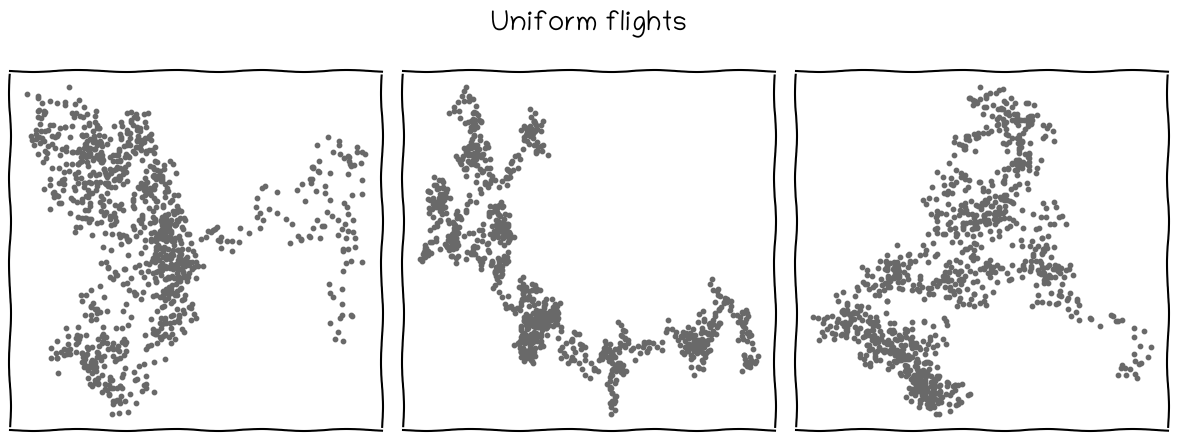

In [7]:
with plt.xkcd(): 
    plt.rcParams["font.family"] = "Chilanka"
    
    fig, ax = plt.subplots( 1, 3, squeeze=False, figsize=(12, 4.5) )

    for i in range(3) :
        walk = full_walk[i]

        ax_ = ax[0, i]

        ax_.scatter( walk[:, 0], walk[:, 1], color="dimgray", s=10 )

        ax_.axes.get_xaxis().set_visible(False)
        ax_.axes.get_yaxis().set_visible(False)
        
    plt.suptitle("Uniform flights", fontsize=20)
    
    plt.tight_layout()
    
    if SAVE_PATH:
        plt.savefig(fname = SAVE_PATH + "uniform.jpeg", dpi=250)
    
    plt.show()

### _Gaussian Flight_

In [8]:
one_dim_dist = lambda : scipy.stats.norm.rvs(loc=0, scale=1, size=1)[0]

In [9]:
full_walk = []

for i in range(3):
    full_walk.append(random_walk(one_dim_dist=one_dim_dist, n=n, dim=dim, start=start))

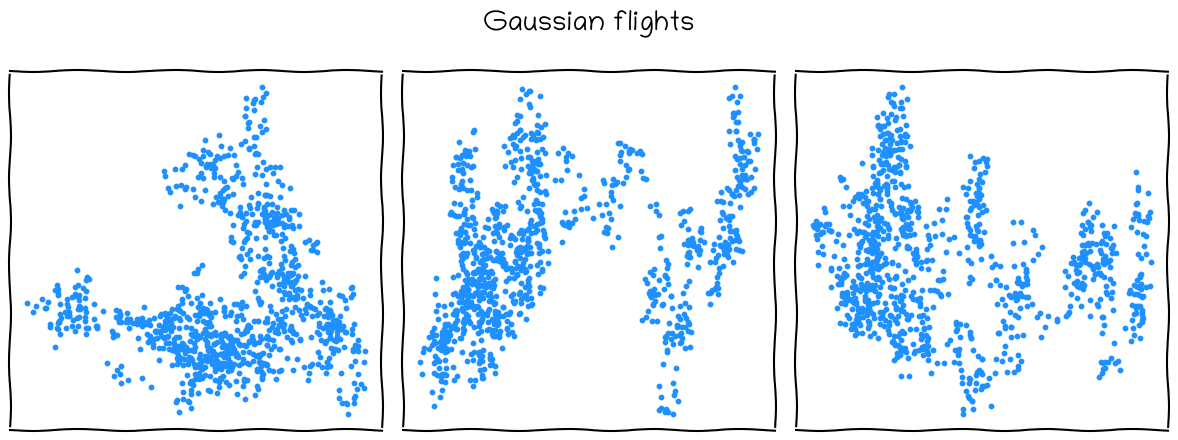

In [10]:
with plt.xkcd(): 
    plt.rcParams["font.family"] = "Chilanka"
    
    fig, ax = plt.subplots( 1, 3, squeeze=False, figsize=(12, 4.5) )

    for i in range(3) :
        walk = full_walk[i]

        ax_ = ax[0, i]

        ax_.scatter( walk[:, 0], walk[:, 1], color="dodgerblue", s=10 )

        ax_.axes.get_xaxis().set_visible(False)
        ax_.axes.get_yaxis().set_visible(False)
        
    plt.suptitle("Gaussian flights", fontsize=20)
    
    plt.tight_layout()
    
    if SAVE_PATH:
        plt.savefig(fname = SAVE_PATH + "gaussian.jpeg", dpi=250)
    
    plt.show()

### _'Gaussian leaps'_

In [11]:
def norm_with_leap(p:float=0.01, 
                   loc_main:float=0, scale_main:float=1, 
                   loc_leap:float=1000, scale_leap:float=1):
    
    if scipy.stats.bernoulli.rvs(p=p, size=1)[0] :
        norm = scipy.stats.norm.rvs(loc=loc_leap, scale=scale_leap, size=1)[0]
        if scipy.stats.bernoulli.rvs(p=0.5, size=1)[0] :
            return - norm
        else :
            return norm
    else :
        return scipy.stats.norm.rvs(loc=loc_main, scale=scale_main, size=1)[0]

In [12]:
one_dim_dist = lambda : norm_with_leap(p=0.1, loc_main=0, scale_main=1, loc_leap=1000, scale_leap=100)

In [13]:
full_walk = []

for i in range(3):
    full_walk.append(random_walk(one_dim_dist=one_dim_dist, n=n, dim=dim, start=start))

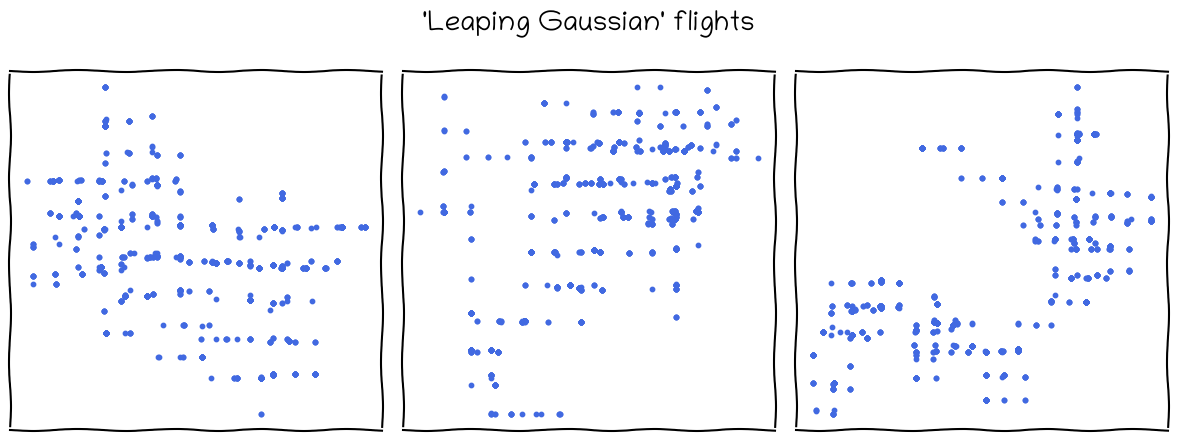

In [14]:
with plt.xkcd(): 
    plt.rcParams["font.family"] = "Chilanka"
    
    fig, ax = plt.subplots( 1, 3, squeeze=False, figsize=(12, 4.5) )

    for i in range(3) :
        walk = full_walk[i]

        ax_ = ax[0, i]

        ax_.scatter( walk[:, 0], walk[:, 1], color="royalblue", s=10 )

        ax_.axes.get_xaxis().set_visible(False)
        ax_.axes.get_yaxis().set_visible(False)
        
    plt.suptitle("'Leaping Gaussian' flights", fontsize=20)
    
    plt.tight_layout()
    
    if SAVE_PATH:
        plt.savefig(fname = SAVE_PATH + "leaping_gaussian.jpeg", dpi=250)
    
    plt.show()

### _Cauchy Flight_

In [15]:
one_dim_dist = lambda : scipy.stats.cauchy.rvs(loc=0, scale=1, size=1)[0]

In [16]:
full_walk = []

for i in range(3):
    full_walk.append(random_walk(one_dim_dist=one_dim_dist, n=n, dim=dim, start=start))

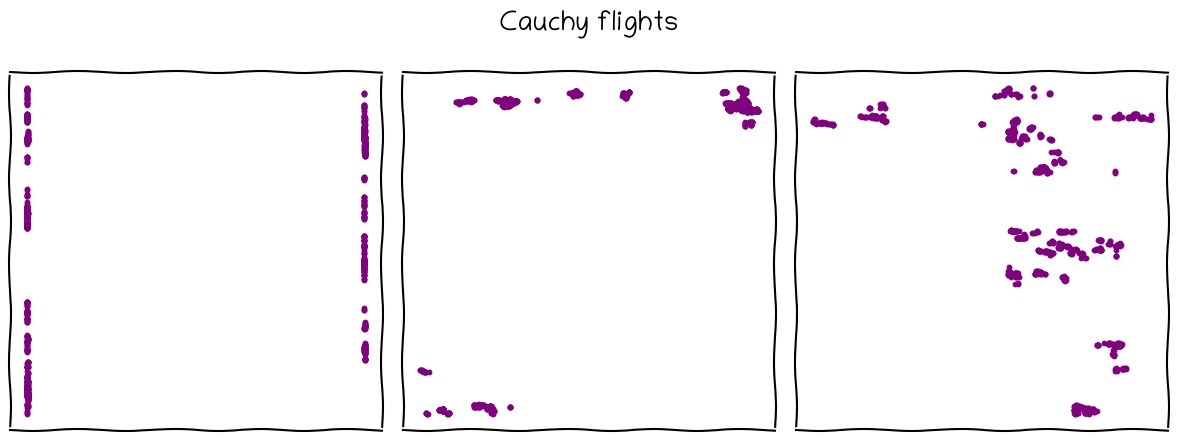

In [17]:
with plt.xkcd(): 
    plt.rcParams["font.family"] = "Chilanka"
    
    fig, ax = plt.subplots( 1, 3, squeeze=False, figsize=(12, 4.5) )

    for i in range(3) :
        walk = full_walk[i]

        ax_ = ax[0, i]

        ax_.scatter( walk[:, 0], walk[:, 1], color="purple", s=10 )

        ax_.axes.get_xaxis().set_visible(False)
        ax_.axes.get_yaxis().set_visible(False)
        
    plt.suptitle("Cauchy flights", fontsize=20)
    
    plt.tight_layout()
    
    if SAVE_PATH:
        plt.savefig(fname = SAVE_PATH + "cauchy.jpeg", dpi=250)
    
    plt.show()

### _Student's t Flight_

In [18]:
one_dim_dist_3moments = lambda : scipy.stats.t.rvs(df=3.5, size=1)[0]
one_dim_dist_2moments = lambda : scipy.stats.t.rvs(df=2.5, size=1)[0]
one_dim_dist_1moment = lambda : scipy.stats.t.rvs(df=1.5, size=1)[0]
one_dim_dist_0moment = lambda : scipy.stats.t.rvs(df=0.5, size=1)[0]

In [19]:
full_walk_3moments = []
full_walk_2moments = []
full_walk_1moment = []
full_walk_0moment = []


for i in range(3):
    full_walk_3moments.append(random_walk(one_dim_dist=one_dim_dist_3moments, n=n, dim=dim, start=start))
    full_walk_2moments.append(random_walk(one_dim_dist=one_dim_dist_2moments, n=n, dim=dim, start=start))
    full_walk_1moment.append(random_walk(one_dim_dist=one_dim_dist_1moment, n=n, dim=dim, start=start))
    full_walk_0moment.append(random_walk(one_dim_dist=one_dim_dist_0moment, n=n, dim=dim, start=start))

In [20]:
all_full_walks = [full_walk_3moments, full_walk_2moments, full_walk_1moment, full_walk_0moment]

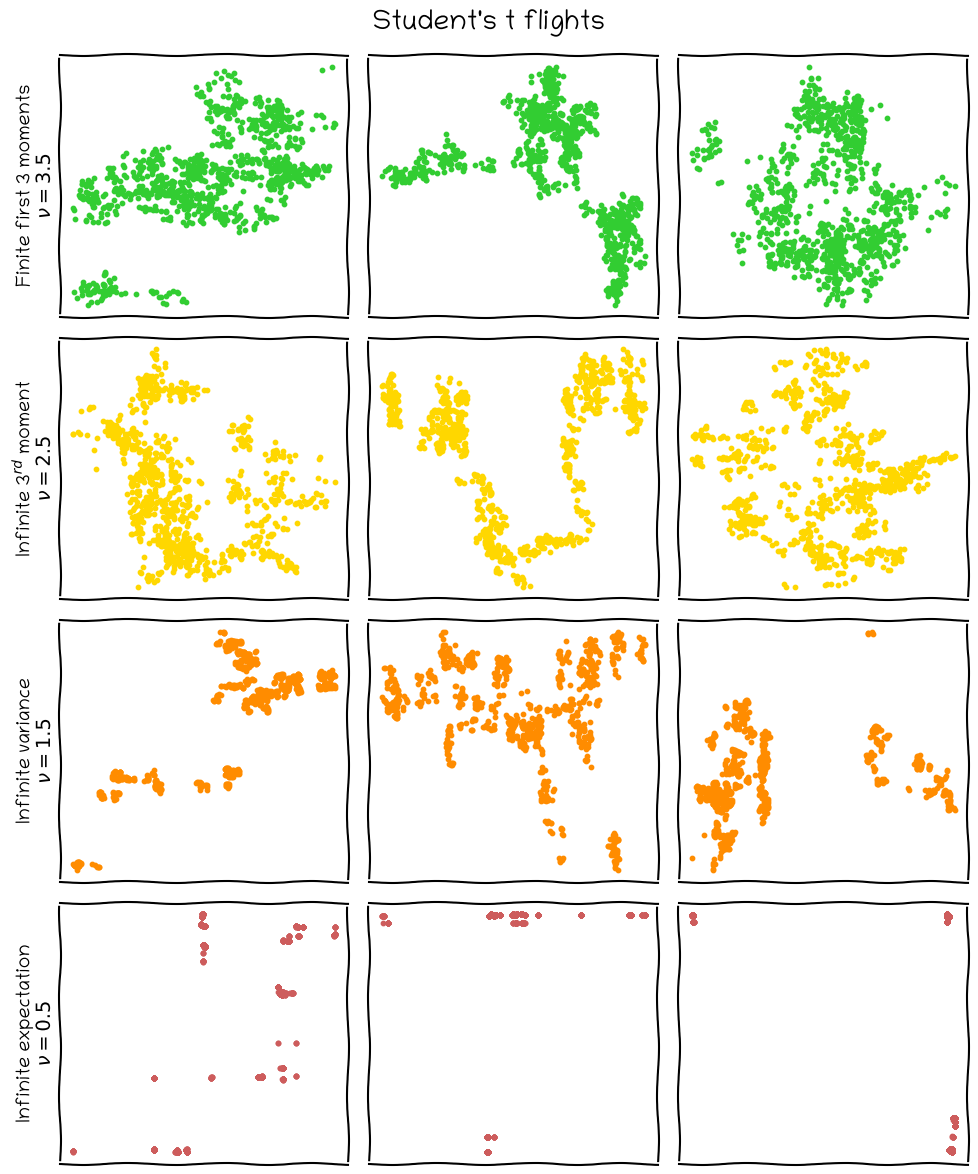

In [21]:
labels = ["Finite first 3 moments\n$\\nu=3.5$", 
          "Infinite 3$^{rd}$ moment\n$\\nu=2.5$", 
          "Infinite variance\n$\\nu=1.5$", 
          "Infinite expectation\n$\\nu=0.5$"]

colors = ["limegreen", "gold", "darkorange", "indianred"]


with plt.xkcd(): 
    plt.rcParams["font.family"] = "Chilanka"
    
    fig, ax = plt.subplots( 4, 3, figsize=(10, 12) )
    
    for x_, full_walk in enumerate(all_full_walks) :
        
        for y_ in range(3) :
            walk = full_walk[y_]
            ax_ = ax[x_, y_]

            ax_.scatter(walk[:, 0], walk[:, 1], color=colors[x_], s=10)

            ax_.axes.get_xaxis().set_visible(False)
            ax_.tick_params(axis='y', left=False, labelleft=False)
            
            if y_ == 0 :
                ax_.set_ylabel(labels[x_])
        
    plt.suptitle("Student's t flights", fontsize=20)
    
    plt.tight_layout()
    
    if SAVE_PATH:
        plt.savefig(fname = SAVE_PATH + "students.jpeg", dpi=250)
    
    plt.show()

### _Reminder of distribution densities used in the experiments_

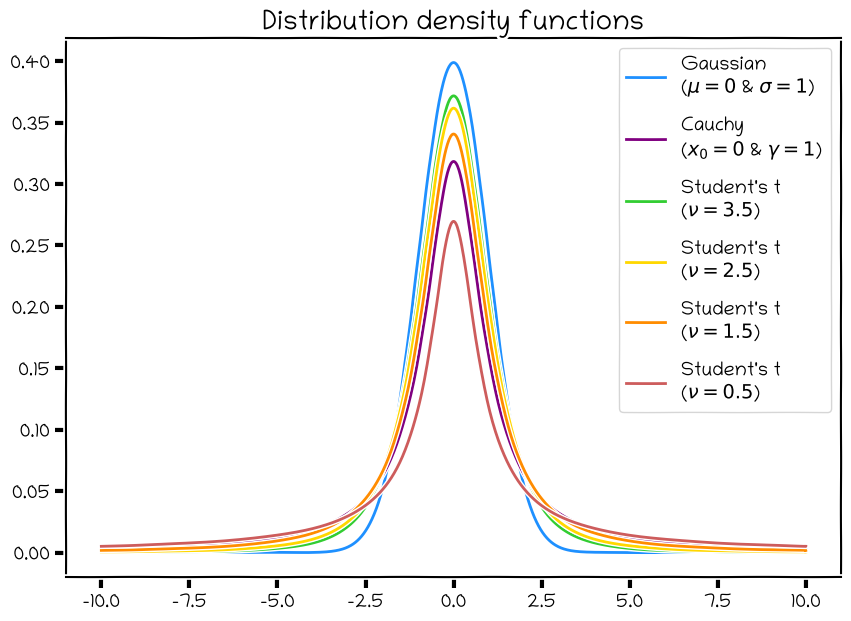

In [22]:
x_min = -10 ; x_max = 10

x = np.linspace(x_min, x_max, 1000)


with plt.xkcd(scale=0.1): 
    plt.rcParams["font.family"] = "Chilanka"
    
    plt.figure(figsize=(10, 7))
    
    lw = 2
    
    plt.plot(x, scipy.stats.norm.pdf(x, loc=0, scale=1), color="dodgerblue", lw=lw, label='Gaussian\n($\mu=0$ & $\sigma=1$)')
    plt.plot(x, scipy.stats.cauchy.pdf(x, loc=0, scale=1), color="purple", lw=lw, label='Cauchy\n($x_{0}=0$ & $\gamma=1$)')

    plt.plot(x, scipy.stats.t.pdf(x, df=3.5), color="limegreen", lw=lw, label="Student's t\n($\\nu=3.5$)")
    plt.plot(x, scipy.stats.t.pdf(x, df=2.5), color="gold", lw=lw, label="Student's t\n($\\nu=2.5$)")
    plt.plot(x, scipy.stats.t.pdf(x, df=1.5), color="darkorange", lw=lw, label="Student's t\n($\\nu=1.5$)")
    plt.plot(x, scipy.stats.t.pdf(x, df=0.5), color="indianred", lw=lw, label="Student's t\n($\\nu=0.5$)")

    plt.legend(labelspacing=0.9)
    
    plt.title("Distribution density functions", fontsize=20)
    
    if SAVE_PATH:
        plt.savefig(fname = SAVE_PATH + "density_distributions.jpeg", dpi=250)

    plt.show()

# Conclusion
            
⭐👏 **Give a star to this Github project and a clap to the blogpost [blogpost](https://medium.com/@jb.excoffier/a-random-walk-with-both-nice-and-extreme-distributions-842a8cc3e048) ! And enjoy your further reading about this subject !** 📖